<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-assignments/blob/main/m5/AST%205/M5_AST_05_Dask_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 5: Dask

## Learning Objectives

At the end of the experiment, you will be able to:

* know and implement dask related libraries
* understand and visualize parallel processing using dask delayed
* implement dask arrays
* handle large and complex datasets in dask dataframes
* implement list using dask bags
* implement Linear Regression using dask-ml

## Information

### Dask

Dask was launched in late 2014 by Matthew Rocklin with aims to bring native scalability to the Python Open Data Science  and overcome its single-machine restrictions. Dask consists of several different components and APIs, which can be categorized into three layers:

* the scheduler
* low-level APIs
* high-level APIs

![Dask_Overview](https://cdn.iisc.talentsprint.com/CDS/Images/Dask_Overview.JPG)

Dask is a free and open-source library for parallel computing in Python. It helps you scale your data science and machine learning workflows. It makes it easy to work with Numpy, Pandas, and Scikit-Learn, but that’s just the beginning. Dask exposes low-level APIs to its internal task scheduler to execute advanced computations. This enables building a personalised parallel computing system that uses the same engine that powers Dask’s Arrays, DataFrames, and machine learning algorithms.

If you have larger-than-memory data, you can use Dask to scale up your workflow to leverage all the cores of your local workstation or even scale out to the cloud.

Dask emphasizes the following virtues:

* The ability to work in parallel with  NumPy array and Pandas DataFrame objects
* Integration with other projects.
* Distributed computing
* Faster operation because of its low overhead and minimum serialisation
* It runs resiliently on clusters with thousands of cores
* Real-time feedback and diagnostics

### Parallel Processing

Parallel processing refers to executing multiple tasks at the same time, using multiple processors in the same machine.

Generally, the code is executed in sequence, one task at a time. However, if you have a complex code that takes a long time to run but has no logic dependency on each other then instead of waiting for the previous task to complete, we compute multiple steps simultaneously. This lets you take advantage of the available processing power, which is the case in most modern computers, thereby reducing the total time taken.

To learn more about dask, follow the link [here](https://docs.dask.org/en/latest/).


In [1]:
# @title Install  the Required Dependensies and Restart the Runtime
!pip -qq install dask[complete]
!pip -qq install dask distributed
!pip -qq install mimesis==7.0.0
!pip -qq install dask
# Uninstalling Numpy 1.24.3 as 'dask_ml' requires numpy<1.24.0, >=1.18.0
!pip -qq uninstall numpy -y
# jax>=0.4.8 is necessarry
!pip -qq install numpy==1.23.4
!pip -qq install dask-ml
!pip install fastapi
!pip install kaleido
!pip install uvicorn
!pip install python-multipart
!pip -qq install jax>=0.4.9
!pip install --upgrade importlib-metadata
!apt-get install -y graphviz
!pip install graphviz
!pip install --upgrade --force-reinstall dask distributed dask_ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 105.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.4 which is incompatible.
chex 0.1.89 requires numpy>=1.2

**Note: After running above cell, we will need to `Restart Runtime` to successfully import dask_ml**

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2418709" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9902028293" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M5_AST_05_Dask_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip -qq install dask[complete]")
    ipython.magic("sx pip -qq install dask distributed")
    ipython.magic("sx pip -qq install mimesis")
    ipython.magic("sx pip -qq install dask")
    #ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/BlackFriday.zip")
    #ipython.magic("sx unzip BlackFriday.zip")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/nycflights.zip")
    ipython.magic("sx unzip nycflights.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing required packages

In [4]:
import os                        # provides interaction with operating system
import dask
import dask.array as da          # for handling large arrays
from dask import delayed         # import the delayed function of dask
import dask.dataframe as dd      # library to import Dask DataFrame
import dask.bag as db            # import the bag from dask
from dask_ml.linear_model import LinearRegression
import json                      # importing JSON files
import numpy as np
import pandas as pd
from time import sleep

**Implementation of Parallel Processing with Dask (Basic Idea)**

Here, we can compare the normal python function with dask delayed function at the time of execution

In [5]:
# define apply_discount function and pass a variable x
def apply_discount(x):
  sleep(1)
  # discount of 20 %
  x=x-0.2*x
  return x

# define two variables a, b and add them
def get_total(a,b):
  sleep(1)
  return a+b

# define function for total price of items
def get_total_price(x,y):
  sleep(1)
  a=apply_discount(x)
  b=apply_discount(y)
  get_total(a,b)

Given a number, the above code simply applies a 20 percent discount on price and then adds them. Inserted a sleep function explicitly, both the functions take 1 sec to execute.

In [6]:
%%time

# apply discount of 20 % on 100
x = apply_discount(100)
# apply a discount of 20 % on 200
y = apply_discount(200)
# add a and b
z = get_total_price(x,y)

CPU times: user 21.4 ms, sys: 7.08 ms, total: 28.5 ms
Wall time: 6 s


We have recorded the time taken for this execution using %%time as shown. You can observe that time taken is ~6.01 seconds when it is executed sequentially. Now, let’s see how to use dask.delayed to reduce this time.

Now, you can transform the functions apply_discount() and get_total_price(). You can use delayed() function to wrap the function calls that you want to turn into tasks.

In [7]:
%%time

# Wrapping all the function calls using dask.delayed
x = delayed(apply_discount)(100)
y = delayed(apply_discount)(200)
z = delayed(get_total_price)(x, y)

CPU times: user 528 µs, sys: 0 ns, total: 528 µs
Wall time: 504 µs


**What does dask.delayed do?**

The Dask delayed function decorates your functions so that they operate lazily. Rather than executing your function immediately, it will defer execution, placing the function and its arguments into a task graph. It wraps a function or object to produce a Delayed.


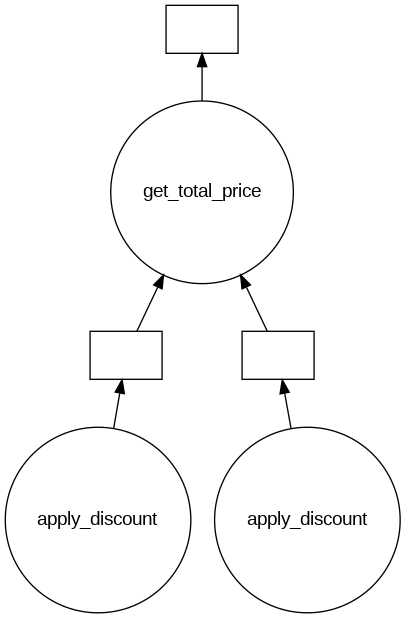

In [8]:
# visualize in graphical way
z.visualize()

Clearly, from the above image, you can see there are two instances of apply_discount() function called in parallel. This is an opportunity to save time and processing power by executing them simultaneously.

Till now, the task graph is computed. To actually execute it, let’s call the compute() method of z.

In [9]:
%%time

# compute() is used to show the result in dask
z.compute()

CPU times: user 19.7 ms, sys: 4.24 ms, total: 23.9 ms
Wall time: 5 s


**Note**: When we create an object, it is just a blueprint until you call `compute()`. That is when the job gets distributed to all the workers, and the actual function gets called, or concrete values are generated.

The total time taken has been reduced. This is the basic concept of parallel computing. Dask makes it very convenient.

To know more about delayed function, click [here](https://docs.dask.org/en/latest/delayed.html)

### Arrays

![dask_array](https://cdn.iisc.talentsprint.com/CDS/Images/Dask_array.JPG)

Dask array provides a parallel, larger-than-memory, n-dimensional array using blocked algorithms.

* Parallel: Uses all of the cores on your computer

* Larger-than-memory: Lets you work on datasets that are larger than your available memory by breaking up your array into many small pieces, operating on those pieces in an order that minimizes the memory footprint of your computation, and effectively streaming data from disk.

* Blocked Algorithms: Performs large computations by performing many smaller computations


In the below example, dask arrays and normal numpy arrays are used and compared based on the time taken for execution.

1. Construct a 40000x40000 array of normally distributed random values broken up into 1000x1000 sized chunks

2. Take the mean along one axis

3. Take every 100th element

To know more about dask arrays, click [here](https://docs.dask.org/en/latest/array.html).

Creating an array with random normal distribution

In [10]:
# creating a random normal dask array with a mean value of 20 and sigma value of 0.2
# 1600 million element array with 1000 by 1000 chunks
x = da.random.normal(20, 0.2, size=(40000, 40000),
                              chunks=(1000, 1000))   # Cut into 1000x1000 sized chunks
# Perform NumPy-style operations to calculate mean along the rows (axis=0)
y = x.mean(axis=0)[::100]

Computing the mean of x and capturing the time using the magical command

In [11]:
%%time
# computing the mean of x
y.compute()

CPU times: user 56.3 s, sys: 1.63 s, total: 57.9 s
Wall time: 14.8 s


array([20.00147264, 19.99843912, 20.00027571, 20.00018165, 20.00057299,
       19.99815119, 20.0010933 , 20.00011555, 19.99936335, 19.99983545,
       19.99993507, 20.00085978, 20.00020462, 20.00034168, 20.00045099,
       20.00067335, 19.99913785, 20.00057098, 19.99927404, 20.00041181,
       19.99939161, 20.00275286, 19.99971421, 19.99934408, 20.00246766,
       19.99906366, 19.99871339, 19.99962973, 19.99886206, 19.9995505 ,
       20.00103827, 20.00067417, 20.00012582, 19.99876902, 19.99965692,
       20.00085511, 19.9996056 , 20.00056155, 19.99915   , 20.00002306,
       19.99899622, 20.00111692, 19.99895453, 20.00084423, 19.99942315,
       19.99914176, 19.99851349, 19.99946945, 20.00160789, 20.0007689 ,
       19.9988157 , 19.9985948 , 20.00092392, 19.9994435 , 20.0016351 ,
       20.00223653, 20.00000892, 19.99824114, 19.99948691, 19.99860255,
       20.00075438, 19.99950146, 19.99868335, 19.999844  , 19.99873867,
       19.99991588, 20.00032652, 19.99886323, 20.00057287, 20.00

Dask.array is a NumPy-like library that operates on large datasets that don’t fit into memory. It extends beyond the linear problems to full N-Dimensional algorithms and a decent subset of the NumPy interface.

Create ``dask.array`` object

We can create a `dask.array` Array object with the `da.from_array` function. This function accepts

1. data: Any object that supports NumPy slicing

2. [chunks](https://docs.dask.org/en/latest/array-chunks.html): A chunk size defines the size of the numpy arrays


**Manipulate ``dask.array`` object as a numpy array**

Now we have an Array and we perform standard numpy-style computations that include arithmetic, mathematics, slicing, reductions, etc.

The interface is familiar, but the actual work is different. dask_array.sum() does not do the same thing as numpy_array.sum().

**What’s the difference?**

dask_array.sum() builds an expression of the computation. It does not do the computation yet. numpy_array.sum() computes the sum immediately.

*Why the difference?*

Dask arrays are split into chunks. Each chunk must have computations run on that chunk explicitly. If the desired answer comes from a small slice of the entire dataset, running the computation overall data would be wasteful of CPU and memory.



#### Performance comparison

Let's create a random numpy array of normal distribution.


In [12]:
%%time
# create a normal distribution array with 400 million element using numpy
x = np.random.normal(20, 0.2, size=(20000, 20000))
# calculate the mean
y = x.mean(axis=0)[::100]
y

CPU times: user 10.5 s, sys: 611 ms, total: 11.1 s
Wall time: 11.2 s


array([19.99716532, 19.99974215, 20.00022754, 19.9991469 , 20.00097471,
       20.00080542, 19.99847281, 20.00167009, 19.99837595, 19.99907023,
       19.99880753, 19.99901385, 19.99920965, 19.99964262, 20.00026846,
       19.99780129, 20.00140383, 20.00190591, 20.00190671, 20.00045048,
       19.99880395, 19.998277  , 20.00145682, 20.00221985, 20.00287014,
       19.99971593, 19.99836255, 20.00075703, 19.99773175, 19.99787667,
       19.99892441, 19.99995059, 19.9987818 , 19.99818724, 20.00124117,
       19.99948277, 20.00101864, 19.99878003, 20.00093024, 20.00203821,
       20.00005109, 19.99778944, 19.99923001, 20.00090392, 20.00071101,
       19.99910961, 20.00047873, 19.99919961, 20.00193621, 19.99872196,
       19.99842694, 19.99758612, 20.00212219, 20.0007875 , 19.99931972,
       19.99963443, 20.00149894, 20.00165287, 19.99981946, 20.00056335,
       20.00132187, 19.99799125, 19.99998766, 20.00052779, 19.99887264,
       20.00014223, 19.99936931, 20.00153899, 19.99840681, 20.00


Now Let's create a random dask array with normal distribution.

In [13]:
%%time
# created the same array as above and made chunks of size 1000x1000
x = da.random.normal(20, 0.2, size=(20000, 20000), chunks=(1000, 1000))
# calculate the mean
y = x.mean(axis=0)[::100]
y.compute()

CPU times: user 14.1 s, sys: 405 ms, total: 14.5 s
Wall time: 3.68 s


array([20.002156  , 19.99863149, 20.00147312, 19.99961817, 19.99938345,
       20.00063627, 19.99958954, 19.99985168, 19.99867762, 20.00137041,
       19.99963178, 20.00033372, 20.00115582, 20.00143103, 20.00115571,
       20.00013185, 20.00069363, 19.99947396, 20.0014732 , 19.99907765,
       19.996182  , 20.00059262, 20.00393253, 20.00086696, 19.99997411,
       19.99727975, 19.99994807, 19.9985483 , 19.99920243, 19.99800198,
       20.00069647, 20.00084193, 20.00033816, 20.00302484, 19.99983823,
       19.99996117, 20.00127517, 20.0002432 , 20.00158703, 20.00153375,
       20.0020803 , 20.00090927, 20.00071506, 19.99880805, 20.00060402,
       19.99850767, 20.00313829, 20.00186293, 19.99815329, 20.00245058,
       19.99925475, 19.99924975, 20.00077921, 20.0005554 , 20.00290854,
       20.00107417, 20.00136487, 20.00104497, 19.9981216 , 20.00217726,
       20.00149574, 20.0028736 , 19.99769058, 19.99901237, 20.00191041,
       20.00245784, 20.00033724, 20.00005971, 20.00040309, 19.99

Notice that the Dask array computation ran in ~13 seconds but used ~25 seconds of user CPU time. The numpy computation ran in ~19 seconds and used ~18 seconds of user CPU time.

Dask finished faster but used more total CPU time because Dask was able to transparently parallelize the computation because of the chunk size.

Let us study another example on dask arrays.

In [14]:
# define the shape of the array
shape = (1000, 4000)
ones_np = np.ones(shape)
ones_np

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(1000, 4000))

This array contains exactly 32 MB of data:

In [15]:
# print the memory of array created
print('%.1f MB' % (ones_np.nbytes / 1e6))

32.0 MB


Now let’s create the same array using dask’s array interface.

A crucial difference with dask is that we must specify the chunks argument. “Chunks” describes how the array is split up over many sub-arrays.

In [16]:
# defining chunk in dask array
chunk_shape = (1000, 1000)
ones = da.ones(shape, chunks=chunk_shape)
ones

dask.array<ones_like, shape=(1000, 4000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

Notice that we just see a symbolic representation of the array, including its shape, dtype, and chunk size. No data has been generated yet. When we call .compute() on a dask array, the computation is triggered, and the dask array becomes a numpy array.

In [17]:
ones.compute()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(1000, 4000))

In order to understand what happened when we called .compute(), we can visualize the dask graph, the symbolic operations that make up the array

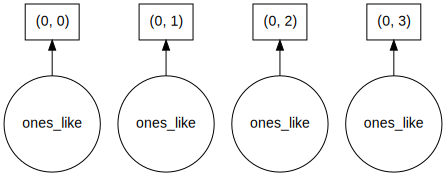

In [18]:
ones.visualize(format='svg')

Our array has four chunks. To generate it, dask calls np.ones four times and then concatenates this together into one array.

Rather than immediately loading a dask array (which puts all the data into RAM), it is more common to reduce the data somehow.

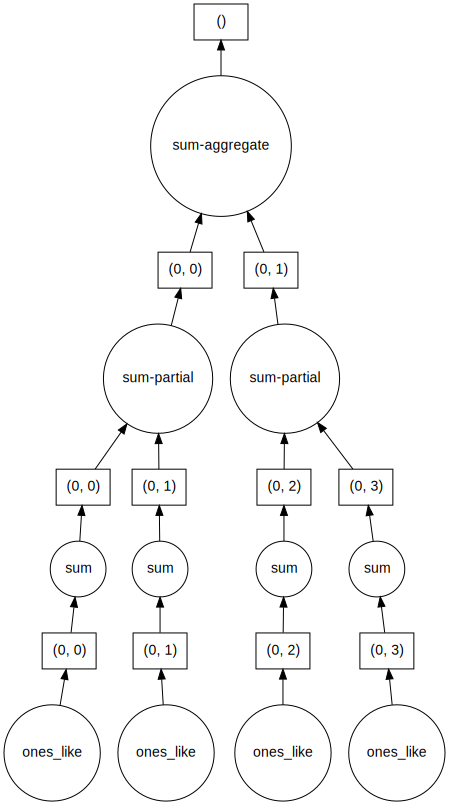

In [19]:
# calculate the sum of elements of dask array
sum_of_ones = ones.sum()
# visualize the sum operation in dask
sum_of_ones.visualize(format='svg')

### DataFrame

A Dask DataFrame is a large parallel DataFrame composed of many smaller Pandas DataFrames, split along **with** the index. One Dask DataFrame operation triggers many operations on the constituent Pandas DataFrames.

Dask DataFrames coordinate many Pandas DataFrames/Series arranged along the index. A Dask DataFrame is partitioned row-wise, grouping rows by index value for efficiency.

![Dask_DF](https://cdn.iisc.talentsprint.com/CDS/Images/Dask_Dataframe.JPG)

To study more about Dask dataframe, refer to the link [here](https://docs.dask.org/en/latest/dataframe.html).

Create a dataframe with random values

In [20]:
# pandas and numpy is used to create dataframe of random values
data = pd.DataFrame()

Dataframe is created with two columns, each having 1500 random values.

In [21]:
# create two columns
data['col1'] = np.random.normal(size=1500)
data['col2'] = np.random.normal(size=1500)
print(data)

          col1      col2
0     2.247327  1.739621
1     0.071698 -0.287657
2     0.398260 -0.639571
3    -0.933030 -0.493973
4     1.776230  1.168140
...        ...       ...
1495 -0.373824  0.061038
1496 -0.317261  0.377630
1497  0.484240 -1.312374
1498  1.687142 -2.186072
1499  1.346848  0.284376

[1500 rows x 2 columns]


Read the dataframe using dask dataframe

In [22]:
# convert pandas dataframe to dask dataframe
ddf = dd.from_pandas(data, npartitions=2)
print(ddf.compute())

          col1      col2
0     2.247327  1.739621
1     0.071698 -0.287657
2     0.398260 -0.639571
3    -0.933030 -0.493973
4     1.776230  1.168140
...        ...       ...
1495 -0.373824  0.061038
1496 -0.317261  0.377630
1497  0.484240 -1.312374
1498  1.687142 -2.186072
1499  1.346848  0.284376

[1500 rows x 2 columns]


In [23]:
# Get a dask DataFrame/Series representing the nth partition
part_1= ddf.get_partition(1)
print(part_1.head())

         col1      col2
750  0.432094 -0.952035
751  1.730025 -1.086086
752 -0.839328  0.038564
753 -0.442775  0.303338
754  1.015298  0.825613


In [24]:
%time ddf['col1'].value_counts().compute()                 # compute the value counts in column 1 and time of execution of code

CPU times: user 28.6 ms, sys: 9.94 ms, total: 38.5 ms
Wall time: 36.9 ms


,count
col1,
-2.913382,1
-2.905316,1
-2.749551,1
-2.564150,1
-2.478624,1
...,...
2.454878,1
2.481855,1
2.718445,1


So, using dask dataframe it is much more time efficient to execute

#### Performance of Dask Dataframe and Pandas Dataframe



In the below example, we can understand how dask dataframes handle complex and large datasets along with pandas dataframe.

We are using 'nycflights' dataset to show how dask differs from pandas.

'nycflights' dataset contains 10 separate csv flights for the year 1990 to 1999.

In [25]:
nycflightsPath = os.path.join('nycflights', 'nycflights', '*.csv')

In [26]:
nycflightsPath

'nycflights/nycflights/*.csv'

In [27]:
# reading all the csv file using dask
df_dd = dd.read_csv(nycflightsPath,
                 parse_dates={'Date':[0,1,2]},
                 dtype={'CRSElapsedTime': 'float64',
                        'TailNum': 'object',
                        'Cancelled': 'bool'})

df_dd.head()

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:594: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,<NA>,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,<NA>,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,<NA>,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,<NA>,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,<NA>,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


Here, we can see that dask dataframe stores all the csv files simultaneously using *.csv (this code reads all the files inside nycflights dataset)

Whereas, when we want to store the files using pandas, it leads to errors. This means pandas is not able to handle and store more than one file simultaneously. So, the following code cell will give an error.

Here, in pandas, we need to store different csv files using separate commands.

In [28]:
# this gives an error
try:
  # using pandas trying to read all csv files
  df_pd = pd.read_csv(nycfllightsPath, parse_dates={'Date':[0,1,2]})
except:
  print("Error Occured!")

Error Occured!


Using pandas we can read one single dataset at a time.

In [29]:
!head /content/nycflights/nycflights/1990.csv

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
1990,1,1,1,1621.0,1540,1747.0,1701,US,33,,86.0,81,,46.0,41.0,EWR,PIT,319.0,,,0,0
1990,1,2,2,1547.0,1540,1700.0,1701,US,33,,73.0,81,,-1.0,7.0,EWR,PIT,319.0,,,0,0
1990,1,3,3,1546.0,1540,1710.0,1701,US,33,,84.0,81,,9.0,6.0,EWR,PIT,319.0,,,0,0
1990,1,4,4,1542.0,1540,1710.0,1701,US,33,,88.0,81,,9.0,2.0,EWR,PIT,319.0,,,0,0
1990,1,5,5,1549.0,1540,1706.0,1701,US,33,,77.0,81,,5.0,9.0,EWR,PIT,319.0,,,0,0
1990,1,6,6,1539.0,1540,1653.0,1701,US,33,,74.0,81,,-8.0,-1.0,EWR,PIT,319.0,,,0,0
1990,1,7,7,1553.0,1540,1713.0,1701,US,33,,80.0,81,,12.0,13.0,EWR,PIT,319.0,,,0,0
1990,1,8,1,1543.0,1540,1656.0,1701,US,33,,73.0,81,,-5.0,3.0,EWR,PIT,319.0,,,0,0
1990,1,9,2,1540.0,1540,1704.0,1701,US,33,,84.0,81,,3.0,0.0,EWR,PIT,319.0,,,0,0


In [30]:
# reading only single csv file
nycf_1990 = pd.read_csv('/content/nycflights/nycflights/1990.csv', parse_dates={'Date':[0,1,2]})

<ipython-input-30-e4248f7bc4e7>:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  nycf_1990 = pd.read_csv('/content/nycflights/nycflights/1990.csv', parse_dates={'Date':[0,1,2]})


Dask dataframes object has no data, unlike the pandas data frame. Dask has just read the start of the first file and the column names and dtypes. That's why dask is considered to be lazy in operation.

For seeing the data in the dask dataframe we need to execute .head() function.

In [31]:
# first five rows of the dataset
df_dd.head()

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,<NA>,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,<NA>,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,<NA>,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,<NA>,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,<NA>,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [32]:
df_dd.compute().shape

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after pa

(2611892, 21)

#### Computations With Dask Dataframes

We want to compute the maximum value of *DepDelay* (the delays occurring in the departure of flights). Now if we are working with simple pandas on this dataset than we need to compute the max. value in each individual data file and concatenate these 10 values together which gives us the required max. value of the whole dataset and this may be put as out of memory.

But in dask dataframe we can handle partition more efficiently.

dask.dataframe lets us write pandas-like code, that operates on larger than memory datasets.


In [33]:
# Read the CSV file using Dask, assuming missing data and avoiding blocksize to handle large datasets
df_dd = dd.read_csv('/content/nycflights/nycflights/1990.csv', assume_missing=True, blocksize=None)

# Inspect the data to verify it is loaded correctly
print(df_dd.head())

     Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  1990.0    1.0         1.0        1.0   1621.0      1540.0   1747.0   
1  1990.0    1.0         2.0        2.0   1547.0      1540.0   1700.0   
2  1990.0    1.0         3.0        3.0   1546.0      1540.0   1710.0   
3  1990.0    1.0         4.0        4.0   1542.0      1540.0   1710.0   
4  1990.0    1.0         5.0        5.0   1549.0      1540.0   1706.0   

   CRSArrTime UniqueCarrier  FlightNum  ...  AirTime  ArrDelay  DepDelay  \
0      1701.0            US       33.0  ...      NaN      46.0      41.0   
1      1701.0            US       33.0  ...      NaN      -1.0       7.0   
2      1701.0            US       33.0  ...      NaN       9.0       6.0   
3      1701.0            US       33.0  ...      NaN       9.0       2.0   
4      1701.0            US       33.0  ...      NaN       5.0       9.0   

   Origin  Dest  Distance TaxiIn TaxiOut  Cancelled  Diverted  
0     EWR   PIT     319.0    NaN     NaN

In [34]:
# Compute the maximum departure delay
%time max_dep_delay = df_dd['DepDelay'].max().compute() # compute() is used in order to get the required value
print(f"Maximum Departure Delay: {max_dep_delay}")

CPU times: user 363 ms, sys: 75 ms, total: 438 ms
Wall time: 436 ms
Maximum Departure Delay: 990.0


Above code has gone through approximately 2 million entries.
As with Delayed objects, we can go through the underlying graphs using `visualize()` method.

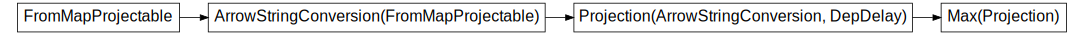

In [35]:
# visualize the above code using structure diagram
df_dd.DepDelay.max().visualize(rankdir='LR', size='15,15!')

### Dask Bag

Dask Bag implements operations like map, filter, fold, and groupby on collections of generic Python objects. It does this in parallel with a small memory footprint using Python iterators. It is similar to a parallel version of PyToolz or a Pythonic version of the PySpark RDD.

Dask bags coordinate many Python lists or Iterators, each of which forms a partition of a larger collection.

Execution on bags provide two benefits:

1. Parallel: data is split up, allowing multiple cores or machines to execute in parallel
2. Iterating: data processes lazily, allowing smooth execution of larger-than-memory data, even on a single machine within a single partition

Bag is the mathematical name for an unordered collection allowing repeats. It uses Parallel lists for semi-structured data.

DataFrames are limited to only two dimensions (rows and columns), but Arrays can have many more, whereas Bag is helpful dealing with JSON blobs or text data (unstructured data).

To study dask bags, refer the link [here](https://docs.dask.org/en/latest/bag.html).

In [36]:
# creating a bag
bag1 = db.from_sequence(range(1000000), partition_size=1000, npartitions=1000)
bag1

dask.bag<from_sequence, npartitions=1000>

In [37]:
final_bag1 = bag1.filter(lambda x: x%100 == 0)

len(final_bag1.compute())

10000

Advantage of using bags with the help of `groupby`

we are looping through a list of values (tuple). We want to take a sum of the second value in tuples where the first value is the same. We have both normal python and dask.bag API version.

In [38]:
# Using python
x = [("a",100), ("b",200), ("c",300), ("d",400), ("e",500), ("a",200), ("e",300)]

# Empty dictionary
result = {}

# Iterate the list for each item as tuple
for key, val in x:
    # sum-up the value if key already exist
    if key in result:
        result[key] += val
    # create a key-value pair
    else:
        result[key] = val

list(result.items())

[('a', 300), ('b', 200), ('c', 300), ('d', 400), ('e', 800)]

Now let's do the same with bags in a simple way using `groupby`.

In [39]:
# using bags API
bag1 = db.from_sequence([("a",100), ("b",200), ("c",300), ("d",400), ("e",500), ("a",200), ("e",300)])

# using groupby
bag1.groupby(lambda x: x[0]).map(lambda x: (x[0], sum([i[1] for i in x[1]]))).compute()

[('e', 800), ('a', 300), ('b', 200), ('d', 400), ('c', 300)]

#### Semi-Structured Data

We create a random set of record data and store it to disk as many JSON files. This will serve as our data for this notebook.

In [40]:
# Create data/ directory
os.makedirs('data', exist_ok=True)

In [41]:
# Make records of people
y = dask.datasets.make_people()

In [42]:
# Encode as JSON, write to disk
y.map(json.dumps).to_textfiles('data/*.json')

['/content/data/0.json',
 '/content/data/1.json',
 '/content/data/2.json',
 '/content/data/3.json',
 '/content/data/4.json',
 '/content/data/5.json',
 '/content/data/6.json',
 '/content/data/7.json',
 '/content/data/8.json',
 '/content/data/9.json']

created and read the JSON files

In [43]:
# read the third row of the dataset
y.take(3)

({'age': 53,
  'name': ('Dusty', 'Graham'),
  'occupation': 'Merchant Seaman',
  'telephone': '071-387-1056',
  'address': {'address': '863 De Boom Parkway', 'city': 'Friendswood'},
  'credit-card': {'number': '5278 9974 0527 6594',
   'expiration-date': '03/23'}},
 {'age': 17,
  'name': ('Tayna', 'Hull'),
  'occupation': 'Transport Consultant',
  'telephone': '+1-(927)-792-7923',
  'address': {'address': '1239 Ruger Mall', 'city': 'Anoka'},
  'credit-card': {'number': '4744 8449 7787 8473',
   'expiration-date': '07/20'}},
 {'age': 44,
  'name': ('Alonso', 'Best'),
  'occupation': 'Mining Engineer',
  'telephone': '807.285.8586',
  'address': {'address': '733 Dorland Shore', 'city': 'Klamath Falls'},
  'credit-card': {'number': '3445 793014 73615', 'expiration-date': '01/18'}})

**Map, Filter on Bag**

We can process this data by filtering out only certain records of interest, mapping functions over it to process our data, and aggregating those results to a total value.

Select only people over 30

In [44]:
# filter the data
y.filter(lambda record: record['age'] > 30).take(2)

({'age': 53,
  'name': ('Dusty', 'Graham'),
  'occupation': 'Merchant Seaman',
  'telephone': '071-387-1056',
  'address': {'address': '863 De Boom Parkway', 'city': 'Friendswood'},
  'credit-card': {'number': '5278 9974 0527 6594',
   'expiration-date': '03/23'}},
 {'age': 44,
  'name': ('Alonso', 'Best'),
  'occupation': 'Mining Engineer',
  'telephone': '807.285.8586',
  'address': {'address': '733 Dorland Shore', 'city': 'Klamath Falls'},
  'credit-card': {'number': '3445 793014 73615', 'expiration-date': '01/18'}})

Select the occupation field

In [45]:
# Selecting particular feature
y.map(lambda record: record['occupation']).take(2)

('Merchant Seaman', 'Transport Consultant')

 Count the total number of records

In [46]:
# computing the total number of records in y
y.count().compute()

10000

### Machine Learning With Dask

Dask-ML wants to enable scalable machine learning in Python. It aims to do so by

1. Working with existing libraries within the Python ecosystem
2. Using the features of Dask to scale computation to larger datasets and larger problems

#### Generalized Linear Models

Generalized linear models are a broad class of commonly used models. These implementations scale out well to large datasets either on a single machine or distributed cluster. They can be powered by a variety of optimization algorithms and use a variety of regularizers.

These follow the scikit-learn estimator API, and so can be dropped into existing routines like grid search and pipelines, but are implemented externally with new, scalable algorithms and so can consume distributed dask arrays and dataframes rather than just single-machine NumPy and Pandas arrays and dataframes.

In [47]:
from dask_ml.datasets import make_regression
from dask_ml.model_selection import train_test_split

X, y = make_regression(n_samples=200000, n_features=100, random_state=0, chunks=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
import numpy as np

# fit the model

lr = LinearRegression()
lr.fit(X_train, y_train)

# predict on test data
pred = lr.predict(X_test)

# Convert to NumPy arrays and handle NaNs
y_test_np = y_test.compute()
pred_np = pred.compute()

# Remove NaNs from both arrays
mask = np.isfinite(y_test_np) & np.isfinite(pred_np)
y_test_np = y_test_np[mask]
pred_np = pred_np[mask]

# Calculate R-squared score
from sklearn.metrics import r2_score
score = r2_score(y_test_np, pred_np)

print(score)

0.9999999876472576


In [49]:
# # fit the model

# lr = LinearRegression()
# lr.fit(X_train, y_train)
# lr.score(X_test,y_test)

In [50]:
#predict on test data
pred=lr.predict(X_test)

In [51]:
# predicted values
pred.compute()

array([ 119.89546933, -156.11135037,   90.85739766, ..., -108.13228557,
         54.50117844,  -53.99543942], shape=(20000,))

To know more about dask-ml, click [here](https://ml.dask.org/).

### Please answer the questions below to complete the experiment:

In [52]:
# @title Select the FALSE statement: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Dask can operate in parallel only on datasets that fit into the main memory" #@param ["","Dask can operate in parallel only on datasets that fit into the main memory","Dask provides high level Array Bag and DataFrame collections that mimic NumPy lists and Pandas","Dask provides dynamic task schedulers that execute task graphs in parallel","Dask performs lazy execution by saving the set of inputs and executing only on demand"]

In [53]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [54]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [55]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [56]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [57]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [58]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5295
Date of submission:  25 May 2025
Time of submission:  23:34:14
View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions
